In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/fraud_data.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

(None,
   trans_date_trans_time                          merchant        category  \
 0      04-01-2019 00:58  "Stokes, Christiansen and Sipes"     grocery_net   
 1      04-01-2019 15:06                      Predovic Inc    shopping_net   
 2      04-01-2019 22:37                   Wisozk and Sons        misc_pos   
 3      04-01-2019 23:06                    Murray-Smitham     grocery_pos   
 4      04-01-2019 23:59                        Friesen Lt  health_fitness   
 
       amt   city state      lat      long  city_pop  \
 0   14.37  Wales    AK  64.7556 -165.6723       145   
 1  966.11  Wales    AK  64.7556 -165.6723       145   
 2   49.61  Wales    AK  64.7556 -165.6723       145   
 3  295.26  Wales    AK  64.7556 -165.6723       145   
 4   18.17  Wales    AK  64.7556 -165.6723       145   
 
                           job         dob                         trans_num  \
 0  "Administrator, education"  09-11-1939  a3806e984cec6ac0096d8184c64ad3a1   
 1  "Administrator, educa

In [2]:
pip install imbalanced-learn


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [4]:
# Drop irrelevant columns
df_cleaned = df.drop(columns=['trans_date_trans_time', 'merchant', 'city', 'state', 'dob', 'trans_num', 'job'])

In [5]:
# Encode categorical columns
label_encoders = {}
for col in ['category', 'is_fraud']:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le


In [9]:
# Define features and target
X = df_cleaned.drop(columns=['is_fraud'])
y = df_cleaned['is_fraud']



In [10]:
# Reload the dataset
df = pd.read_csv('/content/fraud_data.csv')

# Drop irrelevant columns again
df_cleaned = df.drop(columns=['trans_date_trans_time', 'merchant', 'city', 'state', 'dob', 'trans_num', 'job'])

# Encode categorical columns again
label_encoders = {}
for col in ['category', 'is_fraud']:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Check class distribution
df_cleaned['is_fraud'].value_counts()


,count
is_fraud,
0,12600
2,1844
3,1
1,1


In [11]:
# Check unique values in the original is_fraud column before encoding
df['is_fraud'].unique()


array(['1', '1"2020-12-24 16:56:24"', '0', '0"2019-01-01 00:00:44"'],
      dtype=object)

In [12]:
# Fix the is_fraud column by extracting only the first character and converting to integer
df_cleaned['is_fraud'] = df['is_fraud'].astype(str).str[0].astype(int)

# Verify the class distribution again
df_cleaned['is_fraud'].value_counts()


,count
is_fraud,
0,12601
1,1845


In [14]:
# Define features and target again
X = df_cleaned.drop(columns=['is_fraud'])
y = df_cleaned['is_fraud']




In [15]:

# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [18]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:

# Train a RandomForest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report

(0.9611188256298353,
 '              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96      2560\n           1       0.97      0.95      0.96      2481\n\n    accuracy                           0.96      5041\n   macro avg       0.96      0.96      0.96      5041\nweighted avg       0.96      0.96      0.96      5041\n')

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9611188256298353
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2560
           1       0.97      0.95      0.96      2481

    accuracy                           0.96      5041
   macro avg       0.96      0.96      0.96      5041
weighted avg       0.96      0.96      0.96      5041

Confusion Matrix:
 [[2487   73]
 [ 123 2358]]


In [22]:
# Example new transaction (replace values with real data)
new_transaction = [[1200, 3, 45, 500, 0, 1, 2]]  # Replace with actual feature values

# Scale the new data
new_transaction_scaled = scaler.transform(new_transaction)

# Predict fraud or not
prediction = model.predict(new_transaction_scaled)

if prediction[0] == 1:
    print("⚠️ Fraud Detected!")
else:
    print("✅ Transaction is Safe.")


✅ Transaction is Safe.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-validation scores: [0.95710389 0.96081349 0.9578373  0.9593254  0.96006944]
Mean Accuracy: 0.9590299055608689


In [24]:
# Count fraud and non-fraud predictions
import numpy as np

fraud_cases = np.sum(y_pred == 1)
non_fraud_cases = np.sum(y_pred == 0)

print("Predicted Fraud Cases:", fraud_cases)
print("Predicted Non-Fraud Cases:", non_fraud_cases)


Predicted Fraud Cases: 2431
Predicted Non-Fraud Cases: 2610


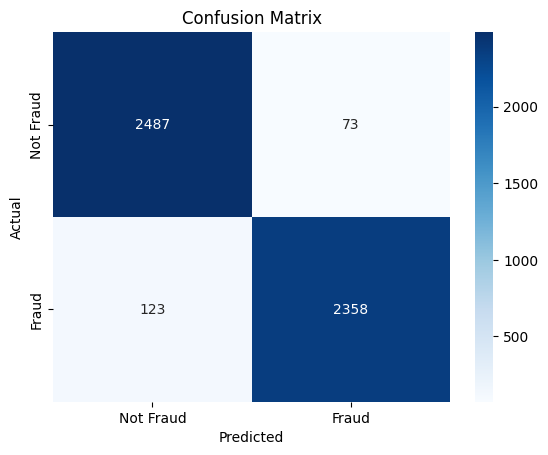

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


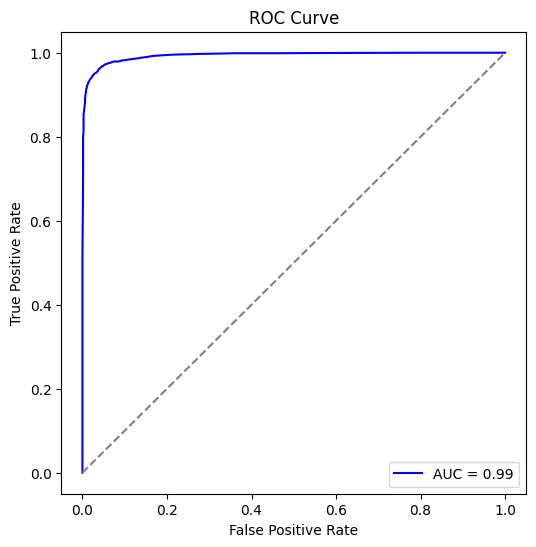

In [26]:
from sklearn.metrics import roc_curve, auc

# Get probability scores
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
